In [1]:
from pathlib import Path
import yaml
import pandas as pd

In [3]:
wd_path = Path.cwd()
metadata_path = wd_path.joinpath("medleydb/data/Metadata")

audio_path = Path("D:\Théo\MedleyDB\V1")

print("wd: {}, metadata: {}, audio: {}".format(wd_path, metadata_path, audio_path))

wd: d:\Théo\GitHub\medleydb, metadata: d:\Théo\GitHub\medleydb\medleydb\data\Metadata, audio: D:\Théo\MedleyDB\V1


In [4]:
audio_files = [a.name for a in audio_path.iterdir() if a.is_dir()]

### Liste des fichiers audio de la V1

In [5]:
audio_files[:5]

['AClassicEducation_NightOwl',
 'AimeeNorwich_Child',
 'AimeeNorwich_Flying',
 'AlexanderRoss_GoodbyeBolero',
 'AlexanderRoss_VelvetCurtain']

### Parcours des metadata

In [6]:
metadata_files = [m for m in metadata_path.glob('*.yaml')]
metadata_files[:5]

[WindowsPath('d:/Théo/GitHub/medleydb/medleydb/data/Metadata/AcDc_BackInBlack_METADATA.yaml'),
 WindowsPath('d:/Théo/GitHub/medleydb/medleydb/data/Metadata/AClassicEducation_NightOwl_METADATA.yaml'),
 WindowsPath('d:/Théo/GitHub/medleydb/medleydb/data/Metadata/Adele_SomeoneLikeYou_METADATA.yaml'),
 WindowsPath('d:/Théo/GitHub/medleydb/medleydb/data/Metadata/Aerosmith_LoveInAnElevator_METADATA.yaml'),
 WindowsPath('d:/Théo/GitHub/medleydb/medleydb/data/Metadata/AHa_TakeOnMe_METADATA.yaml')]

In [7]:
metadata_filenames = [m.name.split("_METADATA")[0] for m in metadata_files]
metadata_filenames[:5]

['AcDc_BackInBlack',
 'AClassicEducation_NightOwl',
 'Adele_SomeoneLikeYou',
 'Aerosmith_LoveInAnElevator',
 'AHa_TakeOnMe']

In [8]:
match = [m for m in metadata_files if m.name.split("_METADATA")[0] in audio_files]

In [9]:
len(match)

122

### Création d'un dataframe à partir des fichiers metadata

In [10]:
metadata_df = pd.read_csv(metadata_path.joinpath("metadata.csv"), index_col=0)

In [11]:
metadata_df.head()

,album,artist,composer,excerpt,genre,has_bleed,instrumental,mix_filename,origin,producer,raw_dir,stem_dir,stems,title,version,website
0,Shaking Through Volume 2,A Classic Education,['A Classic Education'],no,Singer/Songwriter,no,no,AClassicEducation_NightOwl_MIX.wav,Weathervane Music,['Andy Williams'],AClassicEducation_NightOwl_RAW,AClassicEducation_NightOwl_STEMS,"{'S01': {'component': 'bass', 'filename': 'ACl...",Night Owl,1.2,['www.shakingthrough.com/aclassiceducation']
1,NaN,Aimee Norwich,['Aimee Norwich'],no,Singer/Songwriter,no,no,AimeeNorwich_Child_MIX.wav,Independent Artist,['Aimee Norwich & Senem Pirler'],AimeeNorwich_Child_RAW,AimeeNorwich_Child_STEMS,"{'S01': {'component': '', 'filename': 'AimeeNo...",Child,1.2,['www.aimeenorwich.com']
2,NaN,Aimee Norwich,['Aimee Norwich'],no,World/Folk,no,yes,AimeeNorwich_Flying_MIX.wav,Independent Artist,['Aimee Norwich & Senem Pirler'],AimeeNorwich_Flying_RAW,AimeeNorwich_Flying_STEMS,"{'S01': {'component': '', 'filename': 'AimeeNo...",Flying,1.2,['www.aimeenorwich.com']
3,NaN,Alexander Ross,['Alexander Ross'],no,Singer/Songwriter,no,no,AlexanderRoss_GoodbyeBolero_MIX.wav,Independent Artist,['Mike Tierney'],AlexanderRoss_GoodbyeBolero_RAW,AlexanderRoss_GoodbyeBolero_STEMS,"{'S01': {'component': '', 'filename': 'Alexand...",Goodbye Bolero,1.2,[]
4,NaN,Alexander Ross,['Alexander Ross'],no,Singer/Songwriter,no,no,AlexanderRoss_VelvetCurtain_MIX.wav,Independent Artist,['Mike Tierney'],AlexanderRoss_VelvetCurtain_RAW,AlexanderRoss_VelvetCurtain_STEMS,"{'S01': {'component': 'melody', 'filename': 'A...",Velvet Curtain,1.2,[]


## Liste exhaustive des instruments

In [12]:
# on parcours tous les stems et on ajoute les instruments à la liste
instruments_list = []
for stems in metadata_df["stems"]:
    stems = eval(stems)
    for s in stems.values():
        instruments_list.append(s["instrument"])
instruments_list = set(instruments_list)

In [13]:
instruments_list

{'Main System',
 'accordion',
 'acoustic guitar',
 'alto saxophone',
 'auxiliary percussion',
 'bamboo flute',
 'banjo',
 'baritone saxophone',
 'bass clarinet',
 'bass drum',
 'bassoon',
 'bongo',
 'brass section',
 'cello',
 'cello section',
 'chimes',
 'claps',
 'clarinet',
 'clarinet section',
 'clean electric guitar',
 'cymbal',
 'darbuka',
 'distorted electric guitar',
 'dizi',
 'double bass',
 'doumbek',
 'drum machine',
 'drum set',
 'electric bass',
 'electric piano',
 'erhu',
 'female singer',
 'flute',
 'flute section',
 'french horn',
 'french horn section',
 'fx/processed sound',
 'glockenspiel',
 'gong',
 'gu',
 'guzheng',
 'harmonica',
 'harp',
 'horn section',
 'kick drum',
 'lap steel guitar',
 'liuqin',
 'male rapper',
 'male singer',
 'male speaker',
 'mandolin',
 'melodica',
 'oboe',
 'oud',
 'piano',
 'piccolo',
 'sampler',
 'scratches',
 'shaker',
 'snare drum',
 'soprano saxophone',
 'string section',
 'synthesizer',
 'tabla',
 'tack piano',
 'tambourine',
 'teno

## Création d'un dictionnaire pour renommer les STEMS lors du pre-processing

In [14]:
instruments_dict = {i: i.replace(' ', '_') for i in instruments_list}
instruments_dict

{'violin section': 'violin_section',
 'tuba': 'tuba',
 'lap steel guitar': 'lap_steel_guitar',
 'tack piano': 'tack_piano',
 'toms': 'toms',
 'clarinet': 'clarinet',
 'flute section': 'flute_section',
 'harmonica': 'harmonica',
 'electric piano': 'electric_piano',
 'tambourine': 'tambourine',
 'zhongruan': 'zhongruan',
 'viola': 'viola',
 'viola section': 'viola_section',
 'darbuka': 'darbuka',
 'bongo': 'bongo',
 'bassoon': 'bassoon',
 'trumpet section': 'trumpet_section',
 'shaker': 'shaker',
 'horn section': 'horn_section',
 'acoustic guitar': 'acoustic_guitar',
 'oboe': 'oboe',
 'baritone saxophone': 'baritone_saxophone',
 'tabla': 'tabla',
 'melodica': 'melodica',
 'timpani': 'timpani',
 'string section': 'string_section',
 'trumpet': 'trumpet',
 'gu': 'gu',
 'claps': 'claps',
 'oud': 'oud',
 'mandolin': 'mandolin',
 'bamboo flute': 'bamboo_flute',
 'accordion': 'accordion',
 'banjo': 'banjo',
 'auxiliary percussion': 'auxiliary_percussion',
 'alto saxophone': 'alto_saxophone',
 '

### Filtre du dataset sur les TRACKS contenant des STEMS clean electric guitar

In [15]:
clean_el_guitar_stems = []
for stems in metadata_df["stems"]:
    stems = eval(stems)
    for s in stems.values():
        if s["instrument"] == "clean electric guitar":
            clean_el_guitar_stems.append(s["filename"])
clean_el_guitar_stems

['AClassicEducation_NightOwl_STEM_05.wav',
 'AimeeNorwich_Child_STEM_03.wav',
 'AimeeNorwich_Flying_STEM_04.wav',
 'AimeeNorwich_Flying_STEM_05.wav',
 'AlexanderRoss_GoodbyeBolero_STEM_02.wav',
 'AlexanderRoss_GoodbyeBolero_STEM_03.wav',
 'AlexanderRoss_VelvetCurtain_STEM_02.wav',
 'AlexanderRoss_VelvetCurtain_STEM_03.wav',
 'AlexanderRoss_VelvetCurtain_STEM_10.wav',
 'AmarLal_Rest_STEM_01.wav',
 'Auctioneer_OurFutureFaces_STEM_05.wav',
 'CelestialShore_DieForUs_STEM_05.wav',
 'CelestialShore_DieForUs_STEM_08.wav',
 'ChrisJacoby_BoothShotLincoln_STEM_03.wav',
 'ClaraBerryAndWooldog_AirTraffic_STEM_04.wav',
 'CroqueMadame_Oil_STEM_02.wav',
 'CroqueMadame_Pilot_STEM_02.wav',
 'FacesOnFilm_WaitingForGa_STEM_05.wav',
 'FamilyBand_Again_STEM_05.wav',
 'InvisibleFamiliars_DisturbingWildlife_STEM_05.wav',
 'LizNelson_Rainfall_STEM_05.wav',
 'Lushlife_ToynbeeSuite_STEM_10.wav',
 'Lushlife_ToynbeeSuite_STEM_11.wav',
 'Lushlife_ToynbeeSuite_STEM_12.wav',
 'Meaxic_TakeAStep_STEM_02.wav',
 'Meaxic

### Création de la liste des TRACKS contenant clean electric guitar

In [127]:
clean_el_guitar_tracks = set([s.split("_STEM")[0] for s in clean_el_guitar_stems])
clean_el_guitar_tracks

{'AClassicEducation_NightOwl',
 'AimeeNorwich_Child',
 'AimeeNorwich_Flying',
 'AlexanderRoss_GoodbyeBolero',
 'AlexanderRoss_VelvetCurtain',
 'AmarLal_Rest',
 'Auctioneer_OurFutureFaces',
 'CelestialShore_DieForUs',
 'ChrisJacoby_BoothShotLincoln',
 'ClaraBerryAndWooldog_AirTraffic',
 'CroqueMadame_Oil',
 'CroqueMadame_Pilot',
 'FacesOnFilm_WaitingForGa',
 'FamilyBand_Again',
 'InvisibleFamiliars_DisturbingWildlife',
 'LizNelson_Rainfall',
 'Lushlife_ToynbeeSuite',
 'Meaxic_TakeAStep',
 'Meaxic_YouListen',
 'MusicDelta_Beatles',
 'MusicDelta_Britpop',
 'MusicDelta_Country2',
 'MusicDelta_Disco',
 'MusicDelta_Gospel',
 'MusicDelta_Reggae',
 'MusicDelta_Rock',
 'MusicDelta_Rockabilly',
 'MusicDelta_Shadows',
 'PortStWillow_StayEven',
 'SecretMountains_HighHorse',
 'Snowmine_Curfews',
 'StevenClark_Bounty',
 'TablaBreakbeatScience_MoodyPlucks',
 'TablaBreakbeatScience_Vger',
 'TheDistricts_Vermont',
 'TheScarletBrand_LesFleursDuMal'}

In [34]:
blabla = []
blablacar = []
for stems in metadata_df["stems"]:
    stems = eval(stems)
    for s in stems.values():
        blabla.append(s["component"])
        blablacar.append(s["filename"])
        


In [372]:
lsts = []
result = zip(blablacar, blabla)
result = list(result)
for i in result :

    for j in clean_el_guitar_stems :

        if i[0] == j :
            lsts.append(i[1])


In [373]:
results = zip(clean_el_guitar_stems, lsts)
results = list(results)
print(results)
Counter(lsts)

[('AClassicEducation_NightOwl_STEM_05.wav', ''), ('AimeeNorwich_Child_STEM_03.wav', ''), ('AimeeNorwich_Flying_STEM_04.wav', 'melody'), ('AimeeNorwich_Flying_STEM_05.wav', 'melody'), ('AlexanderRoss_GoodbyeBolero_STEM_02.wav', ''), ('AlexanderRoss_GoodbyeBolero_STEM_03.wav', 'melody'), ('AlexanderRoss_VelvetCurtain_STEM_02.wav', ''), ('AlexanderRoss_VelvetCurtain_STEM_03.wav', ''), ('AlexanderRoss_VelvetCurtain_STEM_10.wav', ''), ('AmarLal_Rest_STEM_01.wav', 'melody'), ('Auctioneer_OurFutureFaces_STEM_05.wav', ''), ('CelestialShore_DieForUs_STEM_05.wav', ''), ('CelestialShore_DieForUs_STEM_08.wav', 'melody'), ('ChrisJacoby_BoothShotLincoln_STEM_03.wav', ''), ('ClaraBerryAndWooldog_AirTraffic_STEM_04.wav', 'melody'), ('CroqueMadame_Oil_STEM_02.wav', 'melody'), ('CroqueMadame_Pilot_STEM_02.wav', 'melody'), ('FacesOnFilm_WaitingForGa_STEM_05.wav', ''), ('FamilyBand_Again_STEM_05.wav', ''), ('InvisibleFamiliars_DisturbingWildlife_STEM_05.wav', ''), ('LizNelson_Rainfall_STEM_05.wav', ''), (

Counter({'': 45, 'melody': 11})

In [374]:
lsta = []
clean_el_guitar_tracks = list(clean_el_guitar_tracks)
for i in clean_el_guitar_tracks :
    lsta.append(i+('_MIX.wav'))

In [375]:
lsto = []
has = zip(metadata_df['mix_filename'], metadata_df['has_bleed'])
has = list(has)
for i in has :
    
    for j in lsta :
        
        if i[0] == j :

            lsto.append(i[1])

In [383]:
hasb = zip(lsta, lsto)
hasb = sorted(list(hasb))
hasb

[('AClassicEducation_NightOwl_MIX.wav', 'no'),
 ('AimeeNorwich_Child_MIX.wav', 'no'),
 ('AimeeNorwich_Flying_MIX.wav', 'no'),
 ('AlexanderRoss_GoodbyeBolero_MIX.wav', 'no'),
 ('AlexanderRoss_VelvetCurtain_MIX.wav', 'no'),
 ('AmarLal_Rest_MIX.wav', 'no'),
 ('Auctioneer_OurFutureFaces_MIX.wav', 'no'),
 ('CelestialShore_DieForUs_MIX.wav', 'no'),
 ('ChrisJacoby_BoothShotLincoln_MIX.wav', 'no'),
 ('ClaraBerryAndWooldog_AirTraffic_MIX.wav', 'no'),
 ('CroqueMadame_Oil_MIX.wav', 'yes'),
 ('CroqueMadame_Pilot_MIX.wav', 'no'),
 ('FacesOnFilm_WaitingForGa_MIX.wav', 'no'),
 ('FamilyBand_Again_MIX.wav', 'no'),
 ('InvisibleFamiliars_DisturbingWildlife_MIX.wav', 'no'),
 ('LizNelson_Rainfall_MIX.wav', 'no'),
 ('Lushlife_ToynbeeSuite_MIX.wav', 'no'),
 ('Meaxic_TakeAStep_MIX.wav', 'yes'),
 ('Meaxic_YouListen_MIX.wav', 'no'),
 ('MusicDelta_Beatles_MIX.wav', 'no'),
 ('MusicDelta_Britpop_MIX.wav', 'no'),
 ('MusicDelta_Country2_MIX.wav', 'no'),
 ('MusicDelta_Disco_MIX.wav', 'no'),
 ('MusicDelta_Gospel_MIX.w

In [347]:
import seaborn as sns

In [348]:
lsto = [i.replace('yes', '1') for i in lsto]
lsto = [i.replace('no', '0') for i in lsto]
df = pd.DataFrame(lsto) 


<AxesSubplot:>

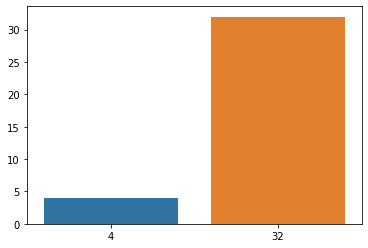

In [349]:
# 32 MIX qui ne sont pas 'has bleed', 4 MIX le sont
sns.barplot(x = df.value_counts(), y = df.value_counts())

In [377]:
lsts = [i.replace('melody', '1') for i in lsts]

df1 = pd.DataFrame(lsts) 

<AxesSubplot:>

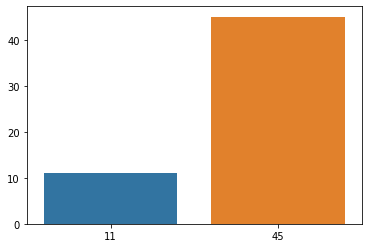

In [382]:
# 11 pistes sont en mélodie, 45 ne sont rien (ni bass, ni mélodie).

sns.barplot(x = df1.value_counts(), y = df1.value_counts())


In [17]:
from collections import Counter

In [18]:
dico = {}
lstf = []

for i in range(0,len(instru['stems']),1) : 

    s = eval(instru.iloc[i].stems)

    for c in s:

        piste = (s[c]["filename"])
        inst = (s[c]["instrument"])
        dico[piste] = inst
        lstf.append(inst)


NameError: name 'instru' is not defined

In [ ]:
lstp = []

for key, values in dico.items() :

    lstp.append(key)

    if key[:20] == 

        



In [24]:
Counter(lstf)

Counter({'drum set': 18,
         'fx/processed sound': 27,
         'electric bass': 17,
         'clean electric guitar': 10,
         'piano': 18,
         'cello': 13,
         'trombone': 4,
         'clarinet': 8,
         'acoustic guitar': 11,
         'drum machine': 12,
         'mandolin': 9,
         'tabla': 16,
         'kick drum': 1,
         'double bass': 16,
         'auxiliary percussion': 6,
         'synthesizer': 16,
         'string section': 3,
         'distorted electric guitar': 6,
         'harmonica': 1,
         'violin': 27,
         'viola': 8,
         'chimes': 1,
         'snare drum': 1,
         'flute': 12,
         'french horn': 6,
         'bassoon': 6,
         'horn section': 2,
         'trumpet': 8,
         'tack piano': 3,
         'violin section': 15,
         'Main System': 6,
         'claps': 1,
         'darbuka': 1,
         'doumbek': 1,
         'oud': 2,
         'bongo': 1,
         'vocalists': 1,
         'glockenspiel': 1,
 

In [ ]:
def contains_guitar(f):
    f = eval(f)
    return "clean electric guitar" in [f[c]["instrument"] for c in f]

In [ ]:
instru.loc[:, "guitar"] = instru.loc[:, "stems"]

In [ ]:
instru.loc[:, "guitar"] = instru["guitar"].map(contains_guitar)

In [ ]:
instru[instru["guitar"] == 1]